# Travaux Pratiques Intelligence Artificielle: Lab1

Python 4 Data Science: Introduction à NumPy et Pandas 🤖 🙌.

## Objectifs du TP:

> **Se familiariser avec les instructions NumPy**

> **Se familiariser avec les commandes les plus utilisées pour l'exploration des données en utilisant la libraire Pandas**

> **Analyser les données pour pouvoir répondre à la question: Qu'est ce qui fait un Hit?** Pour ce faire, nous allons analyser les pistes musicales dont les données sont extraites de Spotify API. 



<br> A la fin du TP vous devez **rendre ce notebook dans "Assignment" de Teams**. Le TP doit être travaillé en préférence en binôme.

_Besoin d'aide? Laisser moi un Commentaire sur Teams_

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercices Numpy

### I. Warm-up Exercice

Ce petit exercice a pour objectif de vous familiariser avec les matrices multi-dimensionnelles NumPy.

<img src="resources/array.png" width=420>

1. Créer la matrice dépictée dans la figure

In [166]:
# import numpy
import numpy as np

In [167]:
# Créer la matrice
m = np.arange(25).reshape(5, 5)

In [168]:
# explorer la matrice 
print(m)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


2.  Ecrire les instructions pour sélectionner les éléments en rouge, bleu et jaune.

In [169]:
# selectionner les éléments jaunes
m[-1]

array([20, 21, 22, 23, 24])

In [170]:
# selectionner les éléments rouges
m.T[[1, 3]]

array([[ 1,  6, 11, 16, 21],
       [ 3,  8, 13, 18, 23]])

In [171]:
# selectionner les éléments bleus
m.flatten()[[5, 7, 15, 17]]

array([ 5,  7, 15, 17])

<br>

### II. Manipulation d'une image avec NumPy

L'objectif de cet exercice est de démontrer l'intérêt de NumPy, particulièrement pour la manipulation des images. Une image peut être considérée comme une matrice et peut donc facilement subir les transformations NumPy. 

On voudrait, dans cet exercice, lire une image, puis essayer de la brouiller (la rendre floue). Pour cela, on va essayer d'affecter à chaque pixel la moyenne de ses pixels voisins. 

Il est possible bien évidemment de faire la chose en bouclant sur les éléments de la matrice (double boucle). Mais on s'intéresse à le faire d'une manière optimisée en utilisant NumPy.

Essayons d'appliquer l'algorithme sur une petite matrice (il faut dire que ce n'est pas un algorithme state of the art, mais il fait l'affaire). Prenons une image de 4x4 pixels. L'idée est de la réduire en une image à 4 pixels comme c'est illustré dans la figure suivante:

<img src="resources/flou1.png">

In [172]:
matrice = np.arange(1,17).reshape((4,4))

In [173]:
matrice

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [174]:
matrice.shape

(4, 4)

<br> Calculer la moyenne des pixels voisins de chaque pixel flaggé dans notre image source revient à calculer la moyenne des matrices suivantes: 

<img src="resources/flou2.png">

<br> Selectionner le centre de cette matrice (jaune). Utilier les indexes relatifs pour que votre code soit généralisable pour n'importe quelle taille de matrice.

In [175]:
mc = matrice[1:-1, 1:-1]

<br> Selectionner le haut de cette matrice (violet):

In [176]:
mt = matrice[0:-2, 1:-1]

<br> Selectionner le bas de cette matrice (Rouge):

In [177]:
md = matrice[2: , 1:-1]

<br> Selectionner la partie gauche de cette matrice (bleu):

In [178]:
ml = matrice[1:-1, 0: -2]

<br> Selectionner la partie droite de cette matrice (vert):

In [179]:
mr = matrice [1:-1, 2: ]

<br> Calculer la matrice des moyennes (element-wise):

In [180]:
 (mc+mt+md+ml+mr)/np.full((int(len(matrice)/2), int(len(matrice)/2)), 5)

array([[ 6.,  7.],
       [10., 11.]])

<br> Cette matrice présente l'image brouillée de l'image source.

<br> Maintenant on va généraliser cela sur une image quelconque, en définissant une fonction:

In [181]:
def brouiller(image):
    mc = image[1:-1, 1:-1]
    mt = image[0:-2, 1:-1]
    md = image[2: , 1:-1]
    ml = image[1:-1, 0: -2]
    mr = image [1:-1, 2: ]
    
    image_brouillee0 =  (mc + mt + md + ml + mr)
    image_brouillee = image_brouillee0/np.full(image_brouillee0.shape, 5)
    
    return image_brouillee

<br> Pour tester notre fonction, nous allons essayer de brouiller l'image "Metro". On utilisera Matplotlib pour ouvrir le fichier image.

In [182]:
import matplotlib.pyplot as plt

In [183]:
image = plt.imread('resources/Metro.png')

In [184]:
image

array([[0.6039216 , 0.6431373 , 0.6784314 , ..., 0.59607846, 0.5921569 ,
        0.63529414],
       [0.6666667 , 0.654902  , 0.654902  , ..., 0.654902  , 0.64705884,
        0.6392157 ],
       [0.68235296, 0.6784314 , 0.6666667 , ..., 0.61960787, 0.57254905,
        0.5764706 ],
       ...,
       [0.14509805, 0.15294118, 0.16078432, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.14117648, 0.15686275, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863],
       [0.14117648, 0.15294118, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863]], dtype=float32)

In [185]:
type(image), image.dtype, image.shape

(numpy.ndarray, dtype('float32'), (461, 615))

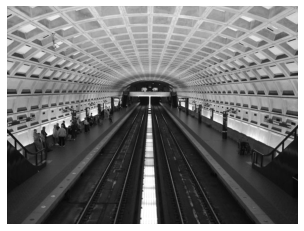

In [186]:
# Ouvrir l'image en gris

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [187]:
image_brouillee = brouiller(image)

In [188]:
image_brouillee.shape

(459, 613)

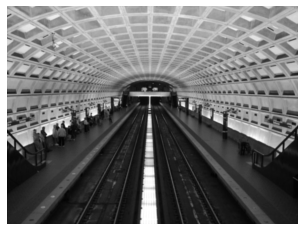

In [189]:
# Afficher la nouvelle image
plt.imshow(image_brouillee)
plt.gray()
plt.axis('off')
plt.show()

<br> Comme on n'a appliqué le filtre qu'une seule fois, les différences sont difficiles à discerner. Mais si vous affichez la différence entre les deux images, vous verrez quelques changements.

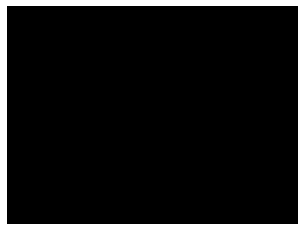

In [190]:
plt.imshow(image - image)
plt.axis('off')
plt.show()

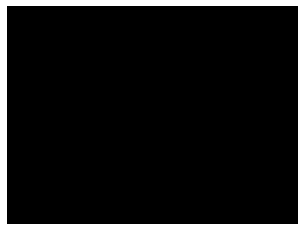

In [191]:
# Afficher la différence entre l'image source et l'image brouillée
plt.imshow(image - image)
plt.axis('off')
plt.show()


<br> Afin d'effectivement brouiller l'image, vous pouvez réappliquer le filtre une 50aine de fois: 

In [192]:
# Boucler et appliquer le filtre, puis afficher l'image résultante
for i in range(50):
    image_brouillee = brouiller(image_brouillee)
    


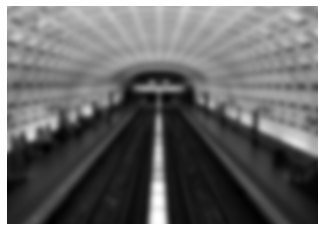

In [193]:
# Afficher la nouvelle image
plt.imshow(image_brouillee)
plt.gray()
plt.axis('off')
plt.show()

<br>

### Explorer d'autres possibilités: 

Vous pouvez explorer d'autres manipulations des images avec Numpy (incluant les données RGB): https://note.nkmk.me/en/python-numpy-image-processing/

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Introduction à Pandas

## A. Importer et examiner les données

Pandas est très fort dans la lecture et le traitement des données structurées. Pour notre analyse, nous aurons besoins de lire les fichiers csv pour pouvoir les explorer. Nos données sont issues de Spotify et englobent plus de 160.000 pistes musicales extraites à partir de Spotify Web API. Ces informations sont également groupées par artiste, année, et genre musical. 

Le dossier music_dataset contient donc 5 fichiers csv:
- data_by_artist
- data_by_genres
- data_by_year
- data_w_genres
- data

Avant d'attaquer les données dans plus de détails, il est très judicieux de commencer par une exploration rapide. Ceci vous permettra de répondre aux questions: A quelles données ai-je affaire? Quelle est la qualité de ces données là?.... 

Les données sont extraites en utilisant l'API de Spotify. Pour plus de détails sur les métadata, vous pouvez explorer: https://developer.spotify.com/documentation/web-api/reference/

#### 1. Importer les données

Commencer par importer pandas en respectant la convention d'import.

In [194]:
import pandas as pd

<br> Lire le fichier csv 'data.csv' relatif aux données des pistes dans une dataframe.

In [195]:
df = pd.read_csv("music_dataset/data.csv")

<br>Afficher les premières lignes de la dataframe créée.

In [268]:
df.head()

,acousticness,artists,number of artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,'Carl Woitschach',1,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",2,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,'Seweryn Goszczyński',1,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,'Francisco Canaro',1,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",2,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


<br> Afficher la taille et la forme de votre dataframe. 

In [197]:
df.shape

(169909, 19)

In [198]:
df.size

3228271

<br></br>
#### 2. Examiner vos données:

<br> Dresser une liste des colonnes avec une description de leurs types, valeurs possibles (intervales si numérique)... Penser à utiliser les différentes fonctions Pandas disponibles. 

In [199]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [200]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [201]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Columns: 19 entries, acousticness to year
dtypes: float64(9), int64(6), object(4)
memory usage: 24.6+ MB


In [202]:
df['year'].value_counts()

1970    2000
1984    2000
1968    2000
1969    2000
2019    2000
        ... 
1925     263
1924     237
1923     169
1921     128
1922      72
Name: year, Length: 100, dtype: int64

<br></br>
#### 2. Modifier vos données:

<br> Changer le type de la colonne popularité en un int.

In [203]:
df["popularity"] = df["popularity"].astype('int32') 

In [204]:
df["popularity"].dtypes

dtype('int32')

<br> Spécifier que l'index de la Dataframe est le nom de la piste. Puis revenez à l'index d'origine.

In [205]:
df.set_index('name')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,,
Singende Bataillone 1. Teil,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
"Fantasiestücke, Op. 111: Più tosto lento",0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
Chapter 1.18 - Zamek kaniowski,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
Bebamos Juntos - Instrumental (Remasterizado),0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Skechers (feat. Tyga) - Remix,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,75,2020-05-15,0.1430,100.012,0.3060,2020
Sweeter (feat. Terrace Martin),0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,64,2020-06-08,0.0403,128.000,0.2700,2020
How Would I Know,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,70,2020-05-29,0.1050,123.700,0.1530,2020


In [206]:
df.reset_index()

,index,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


<br> Supprimer la colonne id faisant référence aux ID des pistes dans Spotify API. Vérifier que la colonne a été supprimée en listant les colonnes.

In [207]:
df.drop('id', inplace=True, axis=1)


In [208]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

<br> Supprimer la première ligne de notre DataFrame. 

In [209]:
df.drop(0)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.9950,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


<br></br>
Maintenant que nous avons une idée sur les données de notre Dataset on peut **penser à des questions à poser. Lister un maximum de questions.** On peut revenir enrichir cette liste au fur et à mesure qu'on explore nos données.
- Quelle est la popularité des pistes selon les années?
- Quels sont les artistes dont les chansons sont unilatéralement bien reçues?
- Quels sont les genres les plus populaires?
- Y-a-t-il des correlations entre les caractéristiques d'une piste et sa popularité?
- ...

<br></br>
## B. Traiter vos données

Pandas fournit une panoplie de fonctions permettant de selectionner, filtrer, ordonner... vos données. On va les utiliser pour mieux comprendre nos données.

### 1. Selectionner les données:

1. Afficher les pistes publiée l'année de votre naissance.

In [210]:
df[df["year"]==1999]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
5954,0.09350,"[""Gov't Mule""]",0.418,549933,0.633,0,0.079000,10,0.7590,-8.138,1,Soulshine,41,1999-02-05,0.0462,122.781,0.483,1999
5955,0.65400,['Grupo Exterminador'],0.550,277467,0.487,0,0.000014,9,0.3600,-9.917,1,El Albur De Tu Vida,43,1999-01-01,0.0892,153.896,0.797,1999
5956,0.90200,"['John Prine', 'Fiona Prine']",0.572,170400,0.187,0,0.000000,6,0.2750,-14.848,1,Til a Tear Becomes a Rose (feat. Fiona Prine),41,1999-09-28,0.0363,133.543,0.513,1999
5957,0.01860,['The Magnetic Fields'],0.471,142600,0.866,0,0.002960,7,0.1170,-8.019,1,I Don't Want to Get Over You,43,1999-09-14,0.0886,120.415,0.265,1999
5958,0.41400,['Grupo Cañaveral De Humberto Pabón'],0.694,326640,0.658,0,0.000483,0,0.0485,-9.215,1,Vuelvo A Sentir,53,1999-01-01,0.0368,159.208,0.746,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167804,0.21700,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",0.515,292933,0.590,0,0.000013,9,0.1280,-7.578,0,I Saved the World Today - Remastered,56,1999-10-19,0.0327,117.835,0.208,1999
167805,0.01030,['311'],0.553,283027,0.901,1,0.003120,0,0.0571,-6.202,1,Sever,42,1999-10-12,0.0454,106.943,0.617,1999
167806,0.01130,['Red Hot Chili Peppers'],0.712,157627,0.969,0,0.031900,4,0.0904,-1.503,0,I Like Dirt,49,1999-06-08,0.1610,105.077,0.802,1999
167807,0.00596,"[""Liran' Roll""]",0.363,200053,0.785,0,0.004670,9,0.1280,-5.321,0,Quien Te Cantara,53,1999,0.0484,155.016,0.536,1999


2. Stocker le résultat dans une nouvelle Dataframe. Combien de pistes y'en a-t-il?

In [211]:
df_1999 = df[df["year"]==1999]

In [212]:
df_1999.shape

(2000, 18)

3. Afficher la colonne 'year' dans la nouvelle Dataframe et vérifier que seule l'année de votre naissance est incluse.

In [213]:
df_1999["year"]

5954      1999
5955      1999
5956      1999
5957      1999
5958      1999
          ... 
167804    1999
167805    1999
167806    1999
167807    1999
167808    1999
Name: year, Length: 2000, dtype: int64

In [214]:
df_1999[df_1999["year"]!=1999]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


4. N'afficher que les informations relatives à l'artiste, le nom de la piste, et sa popularité.

In [215]:
df_1999[['artists', 'name', 'popularity']]

,artists,name,popularity
5954,"[""Gov't Mule""]",Soulshine,41
5955,['Grupo Exterminador'],El Albur De Tu Vida,43
5956,"['John Prine', 'Fiona Prine']",Til a Tear Becomes a Rose (feat. Fiona Prine),41
5957,['The Magnetic Fields'],I Don't Want to Get Over You,43
5958,['Grupo Cañaveral De Humberto Pabón'],Vuelvo A Sentir,53
...,...,...,...
167804,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",I Saved the World Today - Remastered,56
167805,['311'],Sever,42
167806,['Red Hot Chili Peppers'],I Like Dirt,49
167807,"[""Liran' Roll""]",Quien Te Cantara,53


<br>

### 2. Filtrer les données

Revenir à la Dataframe d'origine.

1. N'afficher que les chansons les plus populaires. Vous pouvez choisir un seuil de popularité en fonction de vos données. Voir rapidement la distribution de la popularité en utilisant la fonction hist() de Pandas.

array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

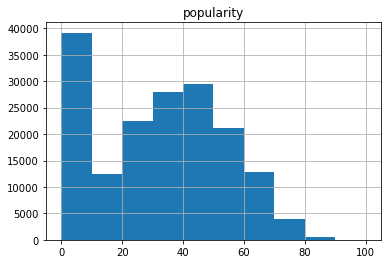

In [216]:
df.hist('popularity')

In [217]:
#on considère qu'une piste est populaire au-delà de 70
df[df['popularity'] > 70]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6754,0.5870,['Gala'],0.704,213394,0.861,0,0.061500,2,0.0992,-4.221,0,Freed From Desire,72,2007-04-18,0.0493,128.990,0.636,2007
7606,0.0251,['Mon Laferte'],0.394,278547,0.475,0,0.007490,10,0.1120,-7.935,1,Tu Falta De Querer,71,2015-08-21,0.0280,129.995,0.441,2015
7845,0.2800,['Imagine Dragons'],0.301,230289,0.672,0,0.000031,2,0.0609,-4.497,1,Next To Me,71,2017-06-23,0.0623,169.497,0.384,2017
7883,0.0988,['TWICE'],0.574,208240,0.909,0,0.000000,8,0.2640,-1.572,1,What is Love,72,2018-07-09,0.0655,169.964,0.565,2018
7895,0.2390,"['Clean Bandit', 'Zara Larsson']",0.715,212733,0.605,0,0.000014,0,0.1890,-5.128,0,Symphony (feat. Zara Larsson),74,2018-11-30,0.0428,122.956,0.454,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169877,0.0181,"['Agust D', 'Kim Jong Wan']",0.560,292079,0.735,1,0.000009,0,0.0571,-6.344,1,Dear my friend (feat. Kim Jong Wan of NELL),72,2020-05-22,0.0638,148.026,0.270,2020
169885,0.8090,['Justin Bieber'],0.566,136907,0.438,0,0.000000,0,0.2120,-7.564,0,All Around Me,72,2020-02-14,0.0367,117.127,0.692,2020
169892,0.1990,['CHUNG HA'],0.636,217239,0.841,0,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.506,2020
169894,0.5920,['Noah Cyrus'],0.618,190183,0.428,0,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.359,2020


2. Afficher les chansons dont l'energie est proche de 1 et la clé est 6.


In [218]:
energy = df['energy'] == 1 #proche de 1?
key = df['key']== 6
df[energy & key]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
17369,0.843,['Unspecified'],0.247,44227,1.0,0,0.747,6,0.496,-10.823,1,"1 1/2 Miles Out above Water, Snapping Shrimp, ...",0,1952-01-01,0.0667,116.574,0.00866,1952
79825,0.880,['Benny Goodman'],0.298,73933,1.0,0,0.889,6,0.403,-19.537,1,Applause; Benny Goodman's 'No Encore' Announce...,7,1938,0.0950,93.226,0.00001,1938
122999,0.139,['Nataural'],0.168,167137,1.0,0,0.999,6,0.928,-10.890,0,Under Shelter Rain,40,1988-05-12,0.0836,113.632,0.00001,1988
144285,0.128,['Epic Soundscapes'],0.069,252330,1.0,0,0.944,6,0.953,-14.577,1,Heavy Rain,72,2020-02-23,0.0514,77.220,0.00001,2020


3. N'affichez que les pistes qui n'ont pas de paroles explicites et qui ont une grande popularité (dont le seuil est à vous de définir).

In [219]:
#on considère qu'une piste est populaire au-delà de 70
popular = df['popularity'] > 70
no_explicit = df['explicit'] == 0 
df[popular & no_explicit]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6754,0.5870,['Gala'],0.704,213394,0.861,0,0.061500,2,0.0992,-4.221,0,Freed From Desire,72,2007-04-18,0.0493,128.990,0.636,2007
7606,0.0251,['Mon Laferte'],0.394,278547,0.475,0,0.007490,10,0.1120,-7.935,1,Tu Falta De Querer,71,2015-08-21,0.0280,129.995,0.441,2015
7845,0.2800,['Imagine Dragons'],0.301,230289,0.672,0,0.000031,2,0.0609,-4.497,1,Next To Me,71,2017-06-23,0.0623,169.497,0.384,2017
7883,0.0988,['TWICE'],0.574,208240,0.909,0,0.000000,8,0.2640,-1.572,1,What is Love,72,2018-07-09,0.0655,169.964,0.565,2018
7895,0.2390,"['Clean Bandit', 'Zara Larsson']",0.715,212733,0.605,0,0.000014,0,0.1890,-5.128,0,Symphony (feat. Zara Larsson),74,2018-11-30,0.0428,122.956,0.454,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169859,0.1190,['Tiagz'],0.960,128926,0.412,0,0.000000,1,0.0903,-11.281,1,My Heart Went Oops,72,2020-01-29,0.6070,121.027,0.490,2020
169862,0.0962,['Ellie Goulding'],0.535,191333,0.648,0,0.000000,10,0.1180,-4.479,1,Power,73,2020-05-21,0.1590,162.084,0.511,2020
169885,0.8090,['Justin Bieber'],0.566,136907,0.438,0,0.000000,0,0.2120,-7.564,0,All Around Me,72,2020-02-14,0.0367,117.127,0.692,2020
169892,0.1990,['CHUNG HA'],0.636,217239,0.841,0,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.506,2020


4. Afficher les pistes dont la popularité est >95 ou la date de publication est antérieure au 01/Juin de cette année. 

In [220]:
popular = df['popularity'] > 95
date = df['release_date'] > '01-06-2020'
df[popular & date]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020


5. Afficher les pistes de votre artiste préféré. Vous pouvez utiliser les fonction str. pour chercher les lignes qui contiennent un bout du nom, mettre le texte en miniscule.. si vous n'êtes pas sûr(e)s comment le nom est stocké dans la dataset.

N.B. Il est possible d'avoir recours à du fuzzy matching en utilisant regex ou des libraries spécialisée.

In [221]:
artist = df['artists'].str.contains('Sia', regex=True)
df[artist]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6882,0.22000,['Sia'],0.513,260120,0.561,0,0.000307,0,0.2360,-5.586,0,Soon We'll Be Found,56,2008-01-01,0.0339,129.923,0.4060,2008
7702,0.01740,['Sia'],0.639,210920,0.785,0,0.001070,10,0.0512,-6.167,0,The Greatest,66,2016-10-21,0.1740,191.950,0.6860,2016
14549,0.19400,"['Zero 7', 'Sia']",0.280,416933,0.386,0,0.022200,0,0.3370,-10.889,1,Somersault,49,2004-03-02,0.0275,146.820,0.1630,2004
15833,0.05990,"['Sia', 'Sean Paul']",0.592,224493,0.788,0,0.000003,6,0.1250,-4.924,0,Cheap Thrills (feat. Sean Paul),61,2016-10-21,0.2010,89.949,0.7550,2016
24063,0.24000,"['88-Keys', 'Mac Miller', 'Sia']",0.525,202391,0.774,1,0.000001,9,0.4950,-4.532,1,That's Life (feat. Mac Miller & Sia),65,2019-06-20,0.2410,154.192,0.5260,2019
31642,0.90300,['Sia'],0.440,250133,0.306,0,0.000000,9,0.0888,-5.403,1,Elastic Heart - Piano Version,63,2015-05-04,0.0377,71.021,0.2500,2015
32171,0.21300,['Sia'],0.682,235532,0.503,0,0.000000,8,0.0944,-5.934,1,Saved My Life,74,2020-05-02,0.0417,113.987,0.3820,2020
46425,0.04290,['Sia'],0.543,276933,0.636,0,0.699000,0,0.1110,-7.372,1,Breathe Me,39,2004-01-01,0.0325,120.045,0.1860,2004
46796,0.00922,['Sia'],0.669,160240,0.693,0,0.000114,11,0.0614,-5.018,0,The Girl You Lost To Cocaine,52,2008-01-01,0.0451,110.392,0.5230,2008
47597,0.00497,['Sia'],0.568,221987,0.936,0,0.013800,6,0.1200,-2.961,0,Never Give Up,67,2016-11-18,0.0530,91.009,0.6050,2016


6. Afficher les pistes dont la clé appartient à la liste: [0, 3, 5, 8, 10]

In [222]:
key_list = df[df["key"].isin([0, 3, 5, 8, 10])]
key_list["key"].unique().tolist()


[10, 8, 5, 3, 0]

7. Afficher les pistes dont la clé n'appartient pas à cette liste

In [223]:
key_list = df[~df["key"].isin([0, 3, 5, 8, 10])]
key_list["key"].unique().tolist()

[1, 11, 6, 9, 7, 4, 2]

8. Filtrer par type de colonne et n'inclure que les colonnes numériques.

In [224]:
df.select_dtypes(include=['number'])

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


9. Définir une playlist de 50 hits les plus énergitiques?

In [225]:
energetic_playlist = df.sort_values(by=['energy'], ascending=False).head(50)

In [226]:
energetic_playlist

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1284,0.892000,['Unspecified'],0.3500,31653,1.000,0,0.735000,4,0.9420,-9.241,1,"Normal Water Noises, Pac.",0,1952-01-01,0.0775,72.884,0.000064,1952
154685,0.673000,['Unspecified'],0.5820,28347,1.000,0,0.846000,0,0.2390,-8.982,1,"60' Water, Pac.",0,1952-01-01,0.1470,99.634,0.021000,1952
12565,0.160000,['Nataural'],0.1540,190334,1.000,0,0.988000,7,0.8910,-10.996,1,Dripping Rain,33,1984-10-12,0.0827,134.026,0.000010,1984
115836,0.236000,['Nature Sounds Nature Music'],0.2980,795449,1.000,0,0.378000,8,0.9480,-12.938,1,3D Thunderstorm Sound Binaural Recording for R...,57,2011-02-16,0.0535,75.201,0.000010,2011
13597,0.016000,['Darkthrone'],0.2670,369760,1.000,1,0.447000,4,0.4500,-4.920,0,Transilvanian Hunger - Studio,44,1994-02-17,0.1350,138.616,0.021500,1994
144285,0.128000,['Epic Soundscapes'],0.0690,252330,1.000,0,0.944000,6,0.9530,-14.577,1,Heavy Rain,72,2020-02-23,0.0514,77.220,0.000010,2020
107298,0.131000,['Maurice Chevalier'],0.1660,190493,1.000,0,0.311000,4,0.3330,-4.373,0,Moi J'fais Mes Coups En Dessous,0,1926,0.0643,116.707,0.000010,1926
107200,0.902000,['Rain Recordings'],0.0771,170000,1.000,0,0.613000,3,0.8450,-16.540,0,Forest Rain,77,2019-09-06,0.0508,171.623,0.000010,2019
70358,0.629000,['Ocean Sounds ACE'],0.1360,149353,1.000,0,0.817000,7,0.9830,-19.375,1,Sleep: Soft Ocean,58,2017-05-06,0.0494,101.062,0.000010,2017
17369,0.843000,['Unspecified'],0.2470,44227,1.000,0,0.747000,6,0.4960,-10.823,1,"1 1/2 Miles Out above Water, Snapping Shrimp, ...",0,1952-01-01,0.0667,116.574,0.008660,1952


10. Définisser si une chanson donnée sera sympathique

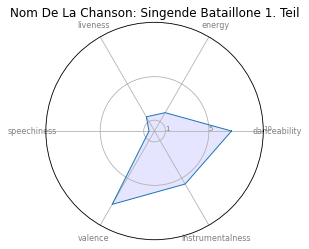

In [227]:
import matplotlib.pyplot as plt
from math import pi
# Prendre les colonnes de précision de sympathie (danceability - energy - speechiness - acounticness - liveness - valence)
categories = ['danceability','energy','liveness','speechiness','valence','instrumentalness']
N = len(categories)
# On va choisir la première ligne comme ligne de test
values=df[categories]
values = values.values.tolist()[0]
values += values[:1]
values = [element * 10 for element in values]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([1,5,10], ["1","5","10"], color="grey", size=7)
plt.ylim(0,10)
plt.title('Nom De La Chanson: ' + df['name'][0])
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

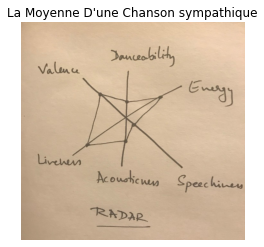

In [228]:
radarAverage = plt.imread('resources/radar.jpeg')
plt.imshow(radarAverage)
plt.axis('off')
plt.title('La Moyenne D\'une Chanson sympathique')
plt.show()

On peut conclure que la chanson prise dans notre exemple est populaire et sympathique, car le resultat du graphe ressemble à la moyenne.

<br>

### 3. Ordonner les données

1. Afficher les pistes selon leur année de publication croissante

In [229]:
df_sort_by_year = df.sort_values(by=['year'])
df_sort_by_year

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
78157,0.9940,['Safiye Ayla'],0.362,182335,0.315,0,0.636000,2,0.3800,-14.111,1,Perestij,0,1921-04-12,0.0646,91.551,0.2860,1921
78098,0.7660,['Mehmet Kemiksiz'],0.453,337607,0.559,0,0.010400,9,0.2130,-8.072,1,Eşin Var âşiyâ Var,0,1921,0.0329,156.077,0.4700,1921
78068,0.7320,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.9630,1921
78069,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
78070,0.9410,['Dennis Day'],0.241,196307,0.274,0,0.000008,0,0.0984,-9.750,0,How Can You Buy Killarny,2,1921,0.0297,90.773,0.2120,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,0.3900,"['Carin Leon', 'Espinoza Paz']",0.641,226979,0.334,0,0.000000,10,0.2470,-5.961,1,Como Duele Equivocarse,68,2020-03-27,0.0333,78.480,0.6810,2020
24217,0.0409,['LAY'],0.739,199499,0.567,0,0.000053,10,0.2710,-8.070,0,玉,64,2020-05-19,0.0511,146.037,0.3120,2020
24218,0.2710,['Brandi Carlile'],0.639,213733,0.666,0,0.000000,0,0.1110,-7.775,1,Carried Me With You,66,2020-02-28,0.0636,98.384,0.3720,2020
70580,0.1700,['Jackboy'],0.650,208751,0.540,1,0.000000,2,0.2100,-9.277,0,Pressure,60,2020-04-24,0.5780,114.083,0.5790,2020


2. Afficher les 10 pistes les plus récentes sur l'ensemble des pistes

In [230]:
df_sort_by_year.tail(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24211,0.3900,"['Jhené Aiko', 'Micahfonecheck']",0.644,269853,0.451,1,0.000042,8,0.5930,-11.079,1,Tryna Smoke,63,2020-03-06,0.1540,149.854,0.779,2020
24212,0.0353,['NCT 127'],0.636,204000,0.915,0,0.000000,1,0.0978,-3.473,1,Punch,69,2020-05-19,0.1830,90.946,0.511,2020
24213,0.6010,['Queen Naija'],0.552,150346,0.686,0,0.000000,8,0.1230,-3.641,1,Butterflies Pt. 2,65,2020-03-13,0.0863,139.736,0.401,2020
24214,0.0428,['BMW KENNY'],0.933,99429,0.632,1,0.004630,10,0.1020,-7.484,0,Wipe It Down,69,2020-04-27,0.4160,140.108,0.534,2020
24215,0.5570,['Surfaces'],0.906,173230,0.541,0,0.000002,11,0.1160,-6.947,1,Good Day,65,2020-02-28,0.0415,124.998,0.788,2020
24216,0.3900,"['Carin Leon', 'Espinoza Paz']",0.641,226979,0.334,0,0.000000,10,0.2470,-5.961,1,Como Duele Equivocarse,68,2020-03-27,0.0333,78.480,0.681,2020
24217,0.0409,['LAY'],0.739,199499,0.567,0,0.000053,10,0.2710,-8.070,0,玉,64,2020-05-19,0.0511,146.037,0.312,2020
24218,0.2710,['Brandi Carlile'],0.639,213733,0.666,0,0.000000,0,0.1110,-7.775,1,Carried Me With You,66,2020-02-28,0.0636,98.384,0.372,2020
70580,0.1700,['Jackboy'],0.650,208751,0.540,1,0.000000,2,0.2100,-9.277,0,Pressure,60,2020-04-24,0.5780,114.083,0.579,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


3. Afficher la piste la plus populaire de votre artiste préféré?  

In [231]:
df_artist = df[df['artists'].str.contains('Madeleine Peyroux')]
df_artist[df_artist['popularity'] == df_artist['popularity'].max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
104911,0.712,['Madeleine Peyroux'],0.727,192173,0.413,0,0.000158,4,0.0765,-9.621,0,(Getting Some) Fun out of Life,58,1996-09-27,0.0346,110.545,0.314,1996


4. Est-ce que les pistes les plus populaires sont toujours les plus récentes ? 

In [269]:
#On doit vérifier la corrélation..

<br>

### 4. Traiter les données manquantes et les données dupliquées

L'un des problèmes les plus récurrents dans les projets data science est la qualité des données à commencer par leur complétude. Il faut toujours se poser la question: **Est-ce qu'il y a des données manquantes? et si c'est le cas comment les gérer?**

Lire le fichier data_withmissingdata.csv dans une Dataframe.

In [233]:
df_w = pd.read_csv("music_dataset/data_withmissingdata.csv")

<br> Il faut d'abord identifier les données manquantes. Quelle(s) colonne(s) est/sont concernées?  

In [234]:
df_w.columns[df_w.isnull().any()]

Index(['year'], dtype='object')

<br> Selectionner les lignes où les données sont manquantes. De combien de lignes s'agit-il?

In [235]:
df_null = df_w[df_w['year'].isnull()]

In [236]:
len(df_null.index)

7

<br> Il est très utile de stocker les indices de ces lignes dans une liste qu'on pourra utiliser pour les selections et les vérifications. Afficher la liste des indexes de ces lignes.

In [237]:
indexes = df_null.index.values.tolist()
indexes

[15, 48, 377, 604, 1540, 1819, 2888]

<br> On voudrait remplir les données manquantes dans year. Pandas offre plusieurs possiblités de méthodes standards à appliquer pour remplir les données manquantes. Dans notre cas, on voudrait remplir par l'année dans release_date. 

Il est possible d'extraire l'année d'une date, mais il faut d'abord convertir la colonne release_date en type date, puis remplir les valeurs manquantes de year par les valeurs year de release_date.

In [238]:
df_w['release_date'] = pd.to_datetime(df_w["release_date"])

In [239]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int32
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [240]:
df_w["year"].fillna(df_w["release_date"], inplace=True)

<br> Vérifier à l'aide de la liste des indexes créée que les valeurs year ont été bel est bien remplies.

In [241]:
#checking example
df_w.loc[[15, 48, 377, 604, 1540, 1819, 2888],  ]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
15,0.991,"['George Butterworth', 'John Cameron']",0.319,184840,0.00593,0,6Sdpmree8xpGWaedACPMlP,0.000063,7,0.0691,-25.789,0,A Shropshire Lad: Is My Team Ploughing?,0,1928-01-01,0.0510,79.831,0.169,1928-01-01 00:00:00
48,0.461,['Shungi Music Crew'],0.733,369721,0.61300,0,6jIUK38SalSc8jYFLW4FYv,0.951000,7,0.1220,-8.749,1,Rumours,0,1928-08-20,0.0383,123.019,0.260,1928-08-20 00:00:00
377,0.960,['Anuradha Paudwal'],0.547,203170,0.22800,0,2OwkpxK4xTOUW2vus3Koct,0.002030,7,0.8090,-12.266,1,Mere Jeevan Ke Saathi,0,1940-12-31,0.0608,113.984,0.614,1940-12-31 00:00:00
604,0.994,['Shamshad Begum'],0.448,191790,0.18200,0,2plEHDXKPHJNcL77bL4GaA,0.747000,1,0.1780,-13.124,1,Naina Bhar Aaye Neer,0,1945-01-01,0.0918,69.041,0.315,1945-01-01 00:00:00
1540,0.479,['Art Blakey'],0.664,180133,0.54900,0,76nNyfv2cOdC4zToPQrG8Z,0.038000,9,0.2570,-10.250,0,Salute to Birdland,2,1954-01-01,0.0462,128.947,0.654,1954-01-01 00:00:00
1819,0.741,['Sonny Rollins'],0.547,316053,0.08730,0,69qn9lq7s1V54v87NUCFQM,0.401000,7,0.0884,-20.051,0,There Is No Greater Love,16,1957-01-01,0.0613,83.749,0.354,1957-01-01 00:00:00
2888,0.554,['Otis Redding'],0.429,185520,0.41600,0,2oLaZVSbX8U2zXrzHiBixE,0.000059,2,0.1140,-10.941,0,I'm Coming Home to See About You,28,1968-02-23,0.0450,166.774,0.480,1968-02-23 00:00:00


<br> Il est notamment possible de supprimer les lignes dont une des valeurs est nulle. Vous pouvez relire les données, supprimer les lignes et réanalyser. 

In [242]:
#relire
df_w = pd.read_csv("music_dataset/data_withmissingdata.csv")
lengthBeforeCleaning = len(df_w.index)
lengthBeforeCleaning

169911

In [243]:
#supprimer
df_w.dropna(axis=0, inplace = True)
lengthAfterCleaning = len(df_w.index)
lengthAfterCleaning

169904

In [244]:
#réanalyser
df_w.columns[df_w.isnull().any()]

Index([], dtype='object')

<br>

#### 2. Traiter les données dupliquées

Il faut toujours s'assurer qu'on n'a pas de lignes dupliquées dans notre dataset. Pandas offre une panoplies de méthodes pour traiter ces cas. Selectionner les lignes dupliquées dans votre nouveau dataframe. 

In [245]:
df = df_w
duplicate = df[df.duplicated()] 
duplicate

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169909,0.9950,['Francisco Canaro'],0.781,180760,0.130,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.720,1928.0
169910,0.0694,"['Lil Wayne', 'Lil Uzi Vert']",0.877,234055,0.554,1,33NAQaVm6TRv1phc0fPsfb,0.000,1,0.0521,-5.905,1,Multiple Flows (with Lil Uzi Vert),65,2020-05-29,0.3020,126.073,0.585,2020.0


<br> Supprimer les lignes dupliquées. S'Assurer de ne pas totalement perdre la donnée.

In [246]:
df = df.drop_duplicates(keep='last')

<br></br>
## C. Analyser vos données

### 1. Corrélations

L'étude des corrélations entre les différentes variables est primordiales pour la compréhension des données mais aussi la modélisation par la suite. Pandas offre une fonction permettant le calcul des corrélations entre les colonnes d'une dataframe. Quelles sont les corrélations dans les données?

In [247]:
df.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265943,-0.079308,-0.750277,-0.253686,0.335830,-0.021686,-0.023886,-0.567067,0.046487,-0.593339,-0.056073,-0.204965,-0.185528,-0.624546
danceability,-0.265943,1.000000,-0.134513,0.220556,0.241894,-0.281457,0.022588,-0.105545,0.294159,-0.045321,0.221087,0.225308,-0.004882,0.560248,0.203438
duration_ms,-0.079308,-0.134513,1.000000,0.036392,-0.043811,0.084797,-0.003121,0.034280,-0.014690,-0.046990,0.063295,-0.058449,-0.028815,-0.198757,0.076300
energy,-0.750277,0.220556,0.036392,1.000000,0.142672,-0.287704,0.029985,0.126305,0.782977,-0.038382,0.497482,-0.045233,0.249916,0.350076,0.532413
explicit,-0.253686,0.241894,-0.043811,0.142672,1.000000,-0.138291,0.008580,0.039275,0.152693,-0.083231,0.214037,0.413073,0.011481,-0.022333,0.245221
instrumentalness,0.335830,-0.281457,0.084797,-0.287704,-0.138291,1.000000,-0.014262,-0.047382,-0.417063,-0.035074,-0.299820,-0.115736,-0.107555,-0.193913,-0.291559
key,-0.021686,0.022588,-0.003121,0.029985,0.008580,-0.014262,1.000000,-0.000116,0.021929,-0.112759,0.010688,0.015229,0.003150,0.029064,0.012517
liveness,-0.023886,-0.105545,0.034280,0.126305,0.039275,-0.047382,-0.000116,1.000000,0.052974,0.005368,-0.075282,0.147674,0.008120,-0.000447,-0.055832
loudness,-0.567067,0.294159,-0.014690,0.782977,0.152693,-0.417063,0.021929,0.052974,1.000000,-0.013182,0.466547,-0.105804,0.211092,0.308405,0.490117
mode,0.046487,-0.045321,-0.046990,-0.038382,-0.083231,-0.035074,-0.112759,0.005368,-0.013182,1.000000,-0.032874,-0.057504,0.014543,0.014717,-0.033105


<br> On a tendance à afficher les corrélations sous forme de heatmap. La manière la plus simple pour créer une heatmap est en utilisant Seaborn, une librairie de visualisation de données. Aller sur https://seaborn.pydata.org/generated/seaborn.heatmap.html et adapter le code pour afficher une heatmap de vos données.

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns; 

<AxesSubplot:>

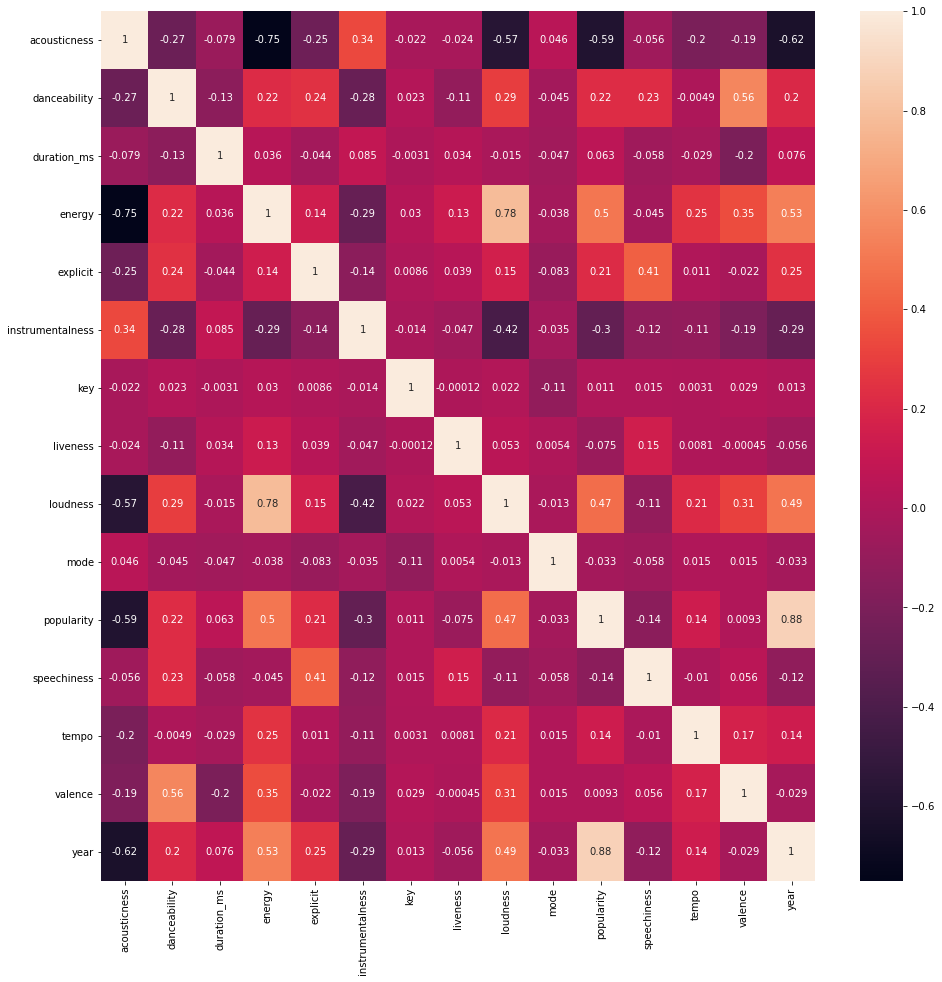

In [249]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(df.corr(), annot=True, ax=ax)

<br> Qu'est-ce que vous pouvez conclure à partir de ces corrélation? 

On remarque une forte corrélation entre year & popularity, et energy & loudness. Make sense!

<br></br>
## D. Analyse avancée

Il est possible d'opérer des modifications directement sur une colonne de votre dataframe. Par exemple, on pourrait assigner à la colonne artists le résultat des manipulations str remplaçant les caractères '[' et ']' par ''.

In [250]:
df = pd.read_csv("music_dataset/data.csv")
df["artists"] = df["artists"].str.replace('[', '')
df["artists"] = df["artists"].str.replace(']', '')
df["artists"].unique().tolist()

["'Carl Woitschach'",
 "'Robert Schumann', 'Vladimir Horowitz'",
 "'Seweryn Goszczyński'",
 "'Francisco Canaro'",
 "'Frédéric Chopin', 'Vladimir Horowitz'",
 "'Felix Mendelssohn', 'Vladimir Horowitz'",
 "'Franz Liszt', 'Vladimir Horowitz'",
 "'Francisco Canaro', 'Charlo'",
 "'Sergei Rachmaninoff', 'Vladimir Horowitz'",
 "'Samuel Barber', 'Vladimir Horowitz'",
 "'Ludwig van Beethoven', 'Staatskapelle Berlin', 'Richard Strauss'",
 "'George Butterworth', 'John Cameron'",
 "'Alexander Scriabin', 'Vladimir Horowitz'",
 "'Francisco Canaro', 'Luis Scalon'",
 "'Thomas Arne', 'John Heddle Nash'",
 "'Moritz Moszkowski', 'Vladimir Horowitz'",
 "'Roger Quilter', 'John Heddle Nash'",
 "'Hafız Yaşar'",
 "'Muzio Clementi', 'Vladimir Horowitz'",
 "'Ignacio Corsini'",
 "'Shungi Music Crew'",
 "'Perchicot'",
 "'Dmitry Kabalevsky', 'Vladimir Horowitz'",
 "'Paul Whiteman'",
 "'Ted Weems & His Orchestra'",
 "'Taj Mahal'",
 "'John Raitt'",
 "'Leroy Carr'",
 "'Hikmet Rıza Hanım'",
 "'Elsie Houston'",
 "'Αντώ

La fonction **apply** est d'une grande utilité lors de la manipulation des dataframes. Elle permet d'appliquer une fonction (de simple à complexe) selon un axe de la dataframe et évite de boucler manuellement sur les lignes ou les colonnes.  

Supposons qu'on veut analyser les duos entre les artistes. Pour ce faire, il faudra d'abord filtrer pour ne garder que les collaborations qui ont fait l'objet de deux artistes. Comme vous l'avez déjà deviné, la colonne artistes, telle qu'elle se présente maintenant, n'est pas très exploitable. De ce fait, nous aurons besoin de la modifier pour ressortir les duos.

Il est possible d'avoir un seul à plusieurs artistes. Nous allons commencer par zoomer sur les collaborations (>= 2 artistes). Pour ce faire, nous allons __1. définir une fonction nombre_artistes__ qui retourne le nombre des artistes qui collaborent sur une piste. Et puis __2. créer une nouvelle colonne__ et lui assigner le résultat de apply de cette fonction sur le dataframe. Penser à diviser le string artists en une liste. 

In [251]:
data_apply = df['artists'].apply(lambda row: len(row.split(",")))
data_apply

0         1
1         2
2         1
3         1
4         2
         ..
169904    2
169905    2
169906    2
169907    2
169908    1
Name: artists, Length: 169909, dtype: int64

In [252]:
df.insert(2, "number of artists", df['artists'].apply(lambda row: len(row.split(","))), True )

In [253]:
df[df["number of artists"]>3]

,acousticness,artists,number of artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
106,0.9920,"'S. Loukopoulos', 'Klarino G. Anestopoulos', '...",4,0.368,204840,0.263,0,3zK60VaQyLm9Tbrji7v4eX,0.890000,9,0.2880,-16.263,1,Xipna Pouli Mou To Proi,0,1930-01-01,0.0476,101.447,0.3120,1930
229,0.9520,"'Samuel Barber', 'Leontyne Price', 'Thomas Sch...",4,0.232,559453,0.188,0,4pz6Hqwt78bMWosL0Kxp5S,0.000669,5,0.0964,-13.759,0,"Antony and Cleopatra, Op. 40: Give Me My Robe",0,1935,0.0387,105.337,0.0379,1935
242,0.9620,"'Jean Sibelius', 'Jascha Heifetz', 'Sir Thomas...",4,0.147,408360,0.160,0,4swEz6fT6V3CR0i8BwzRBF,0.756000,10,0.1860,-19.085,1,Violin Concerto in D minor Op. 47: II. Adagio ...,0,1935,0.0417,91.591,0.0396,1935
255,0.7840,"'n/a', 'Nitsch, Johanens', 'In Motion'",4,0.622,320800,0.484,0,4z7TEhZmXEaHCH3tJXs0xR,0.767000,9,0.0703,-9.426,1,Back home,0,1935,0.0271,107.924,0.3710,1935
266,0.9070,"'N. Vlădoianu', 'N. Constantinescu', 'Ion Vasi...",5,0.336,138867,0.332,0,54UW6BOvKKi9M7kgOGK4q3,0.000000,2,0.3080,-12.923,1,Să nu ne pierdem vremea supărați,0,1935-01-01,0.0329,88.247,0.4320,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169730,0.4040,"'benny blanco', 'Selena Gomez', 'J Balvin', 'T...",4,0.541,158027,0.468,0,1WSGTYKLEpKfNQYYW5Oymt,0.000004,10,0.3580,-4.039,0,"I Can’t Get Enough (benny blanco, Selena Gomez...",75,2019-02-28,0.3620,95.266,0.6900,2019
169776,0.1210,"'Justin Quiles', 'Sech', 'Maluma', 'Dalex', 'F...",7,0.648,305962,0.661,1,7fODjB7BrQTGqh0hogW6XD,0.000002,11,0.1200,-5.027,1,Que Mas Pues - Remix,77,2019-04-19,0.1950,113.363,0.8130,2019
169783,0.0799,"'Sia', 'Diplo', 'Labrinth', 'LSD'",4,0.603,213707,0.615,0,4xigPf2sigSPmuFH3qCelB,0.000067,11,0.1170,-4.931,0,"Genius (feat. Sia, Diplo, and Labrinth)",75,2019-04-12,0.1650,158.657,0.5610,2019
169807,0.5240,"'Dalex', 'Justin Quiles', 'Nicky Jam', 'Rafa P...",7,0.681,286507,0.648,1,7anSoGdgtmJTAPZBzcPhO6,0.000000,1,0.1040,-5.021,0,Cuaderno,77,2019-05-10,0.3800,172.019,0.6870,2019


<br> Afficher le nombre des collaborations selon leur taille.

In [254]:
df["number of artists"].sort_values(ascending=False)

95888     40
169299    22
63942     20
48917     20
56537     20
          ..
106229     1
106228     1
106227     1
106226     1
0          1
Name: number of artists, Length: 169909, dtype: int64

<br> Créer une nouvelle dataframe qui ne contient que les duos. Cette dataframe sera dorénavant l'objet de nos manipulations.

In [255]:
df_duo_o = df[df["number of artists"] == 2]

<br> Créer deux nouvelles colonnes correspondant respectivement aux deux artistes du duo. Il est possible de le faire directement en utilisant la fonction divisant le string en deux et l'assignant aux colonnes. Comme il est opportun de le faire en utilisant la fonction explode qui est peu connue mais extremement utile. Essayer de le faire des deux manières:   

In [256]:
df_duo = df_duo_o.copy()
df_duo[["first_artist", "second_artist"]] = df_duo["artists"].str.split(",", expand=True)
df_duo.head(3)

,acousticness,artists,number of artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,second_artist
1,0.994,"'Robert Schumann', 'Vladimir Horowitz'",2,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,'Robert Schumann','Vladimir Horowitz'
4,0.990,"'Frédéric Chopin', 'Vladimir Horowitz'",2,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,'Frédéric Chopin','Vladimir Horowitz'
5,0.995,"'Felix Mendelssohn', 'Vladimir Horowitz'",2,0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,...,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928,'Felix Mendelssohn','Vladimir Horowitz'


<br> S'assurer que les noms des artistes ne contiennent pas de caractères spéciaux au début et à la fin...

In [257]:
df_duo["first_artist"] = df_duo["first_artist"].str.replace('\'', '') 
df_duo["second_artist"] = df_duo["second_artist"].str.replace('\'', '') 

<br> En utilisant la fonction de groupage sur Pandas, afficher le nombre de collaborations entre les paires d'artists. Afficher les 10 collaborations les plus fréquentes.

In [258]:
df_duo.groupby(["first_artist", "second_artist"]).size().reset_index().nlargest(10, 0)

,first_artist,second_artist,0
2855,Francisco Canaro,Charlo,459
4347,Johann Sebastian Bach,Glenn Gould,301
3020,Frédéric Chopin,Arthur Rubinstein,248
2859,Francisco Canaro,Ernesto Fama,231
8036,Sinclair Lewis,Frank Arnold,212
1047,Billie Holiday,Teddy Wilson,199
2874,Francisco Canaro,Roberto Maida,181
3079,Frédéric Chopin,Vladimir Horowitz,177
3785,Igor Stravinsky,Columbia Symphony Orchestra,163
3407,Giuseppe Verdi,Arturo Toscanini,148


<br> Il est également possible de calculer la moyenne des valeurs d'acousticness,'danceability', 'duration_ms', 'energy'... par pair d'artistes. Penser à ne l'appliquer que là où ça a un sens.

In [259]:
col = ['acousticness', 'artists', 'danceability',
       'duration_ms', 'energy' , 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'first_artist',
       'second_artist']

In [260]:
df_duo[col].groupby(['first_artist', 'second_artist']).mean().reset_index() 

,first_artist,second_artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,"""Amy Hanaialii""",Willie K,0.580000,0.391000,203893.000000,0.270000,0.000528,2.000000,0.151000,-14.275000,1.000000,37.000000,0.032800,149.527000,0.370000
1,"""Anita ODay""",Billy May Orchestra,0.904000,0.343000,259280.000000,0.181000,0.000000,5.000000,0.450000,-12.428000,1.000000,19.000000,0.032300,142.860000,0.314000
2,"""Anita ODay""",Gene Krupa & His Orchestra,0.864500,0.608000,174833.500000,0.374500,0.000682,3.500000,0.090300,-8.343000,0.500000,17.000000,0.038400,106.698500,0.720500
3,"""Anita ODay""",Marty Paich & His Orchestra,0.777800,0.491800,169069.400000,0.206040,0.000213,5.200000,0.157600,-17.153000,0.400000,17.200000,0.089120,124.659400,0.438400
4,"""Anita ODay""",Oscar Peterson Quartet,0.899000,0.580250,187400.000000,0.198433,0.000148,6.250000,0.144442,-17.528333,0.833333,19.333333,0.072633,110.725083,0.453833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,張琪,謝雷,0.911714,0.470286,223224.714286,0.083629,0.136571,5.285714,0.194186,-22.136429,1.000000,20.857143,0.049200,116.606571,0.483000
9664,彭家麗,William So,0.661000,0.673000,268467.000000,0.503000,0.000000,2.000000,0.284000,-8.416000,1.000000,46.000000,0.040500,134.027000,0.318000
9665,湯寶如,Jacky Cheung,0.839000,0.371000,252600.000000,0.195000,0.000727,11.000000,0.105000,-15.859000,0.000000,40.000000,0.033600,159.864000,0.119000
9666,笠井 紀美子,Herbie Hancock,0.085600,0.614000,428427.000000,0.761000,0.618000,8.000000,0.063000,-14.346000,0.000000,38.000000,0.047600,122.889000,0.881000


<br> On voudrait zoomer sur un artiste en particulier pour voir les pistes duos qu'il a sorti, et analyser par la suite leur succès. Filtrer sur un artiste de votre choix qui répond au critère suivant: Il y a des piste où il est artiste 1 et d'autres où il est artiste 2. 

In [261]:
df_duo[df_duo['first_artist'].str.contains('Eminem') | df_duo['second_artist'].str.contains('Eminem') ]

,acousticness,artists,number of artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,second_artist
6178,0.3990,"'JAY-Z', 'Eminem'",2,0.561,337760,0.774,1,1eAZcqDmiUE57YdeElYbMd,0.000002,1,...,0,Renegade,41,2001-09-11,0.4470,77.621,0.8200,2001,JAY-Z,Eminem
6576,0.0507,"'Eminem', 'Nate Dogg'",2,0.963,274440,0.643,1,64649mwn5MP4gz1eIOAerx,0.000049,1,...,0,Shake That,48,2005-12-06,0.1170,107.005,0.5340,2005,Eminem,Nate Dogg
6652,0.0025,"'The Game', 'Eminem'",2,0.611,286787,0.763,1,44ppI3wTXpkgSR3P6nkQup,0.000000,11,...,0,We Ain't,50,2005,0.2770,171.978,0.4960,2005,The Game,Eminem
6780,0.1950,"'The Notorious B.I.G.', 'Eminem'",2,0.648,297227,0.895,1,6SMrWEWukd0DWh5iHGWgks,0.001320,10,...,1,Dead Wrong (feat. Eminem) - 2007 Remaster,49,2007-03-05,0.2800,82.122,0.8170,2007,The Notorious B.I.G.,Eminem
7376,0.3590,"'Eminem', 'Kendrick Lamar'",2,0.766,296953,0.941,1,0iMN420Q45isZVNlAqzPTW,0.000000,9,...,1,Love Game,55,2013-11-05,0.1800,105.519,0.7070,2013,Eminem,Kendrick Lamar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167780,0.0775,"'Dr. Dre', 'Eminem'",2,0.926,222253,0.710,0,5sdjP6WpDav6FZUE20efFs,0.000000,8,...,1,Forgot About Dre - Album Version (Edited),40,1999-11-16,0.0786,133.927,0.6350,1999,Dr. Dre,Eminem
168323,0.0475,"'Eminem', 'Dr. Dre'",2,0.748,200213,0.767,1,5dZqnPqFR45xCZGWmxScqM,0.000000,7,...,1,Guilty Conscience,51,2005-12-06,0.2990,90.863,0.4590,2005,Eminem,Dr. Dre
169230,0.3280,"'Eminem', 'Sia'",2,0.655,300387,0.859,1,0VZs2OQq4axr8GFRdC9nyD,0.000000,10,...,0,Guts Over Fear,53,2014-08-25,0.2210,140.049,0.5250,2014,Eminem,Sia
169855,0.1750,"'Eminem', 'Skylar Grey'",2,0.661,265947,0.748,1,5CpsIb7SMFHjmAG8RvIWfq,0.000000,2,...,0,Leaving Heaven (feat. Skylar Grey),71,2020-01-17,0.2060,171.983,0.5090,2020,Eminem,Skylar Grey


<br> Créer deux Dataframe: une où votre artiste choisi est artiste 1, l'autre où il est artiste 2. 

In [262]:
df1 = df_duo[df_duo['first_artist'].str.contains('Eminem')]

In [263]:
df2 = df_duo[df_duo['second_artist'].str.contains('Eminem')]

<br> Dans une nouvelle Dataframe __df_artiste_duo__, fusionner les deux dataframe de manière à avoir votre artiste dans la colonne artiste 1. Quelles méthodes peut-on suivre? Quelle est la plus optimale?

Cette nouvelle Dataframe nous servira à analyser les pistes duos de notre artiste dans plus de détails. 

In [289]:
df2_rename = df2.copy()
df2_rename.rename(columns={'first_artist':'second_artist','second_artist':'first_artist'}, inplace=True)
df2_rename["second_artist"].str.strip()
df1["second_artist"].str.strip()

6576             Nate Dogg
7376        Kendrick Lamar
23069              Dr. Dre
30651           Elton John
30732                 Dido
31984         Jessie Reyez
38059              Dr. Dre
47374          Skylar Grey
68541              Dr. Dre
70456         Jessie Reyez
75881              Dr. Dre
85932              Dr. Dre
85957                 Dido
86140            Nate Dogg
86170             Dina Rae
86495            Nate Dogg
86946              Rihanna
87031            Lil Wayne
87324              Rihanna
87963           Juice WRLD
96012          Hailie Jade
97558         Joyner Lucas
105261                 D12
105450                 D12
106977          Ed Sheeran
114623       Royce Da 5\9"
114658             Bizarre
114839             Dr. Dre
115066                 D12
115655                P!nk
124339          Obie Trice
125208      Kobe Honeycutt
125460          Nate Ruess
133382             Dr. Dre
133457        Steve Berman
133657           Nate Dogg
134820                 Sia
1

In [297]:
df_artiste_duo = pd.concat([df1, df2_rename])
df_artiste_duo

,acousticness,artists,number of artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,second_artist
6576,0.0507,"'Eminem', 'Nate Dogg'",2,0.963,274440,0.643,1,64649mwn5MP4gz1eIOAerx,0.000049,1,...,0,Shake That,48,2005-12-06,0.1170,107.005,0.534,2005,Eminem,Nate Dogg
7376,0.3590,"'Eminem', 'Kendrick Lamar'",2,0.766,296953,0.941,1,0iMN420Q45isZVNlAqzPTW,0.000000,9,...,1,Love Game,55,2013-11-05,0.1800,105.519,0.707,2013,Eminem,Kendrick Lamar
23069,0.1290,"'Eminem', 'Dr. Dre'",2,0.570,244160,0.883,1,0FXfAepEmqVCMnvOpb8Hoj,0.000000,10,...,0,Hell Breaks Loose,50,2009-05-15,0.2190,78.887,0.911,2009,Eminem,Dr. Dre
30651,0.2050,"'Eminem', 'Elton John'",2,0.655,380280,0.837,0,2iveqBUOzQlQBSxgAlK0bs,0.000000,8,...,1,Stan,52,2005-12-06,0.1400,80.040,0.642,2005,Eminem,Elton John
30732,0.0376,"'Eminem', 'Dido'",2,0.782,404427,0.741,1,0zIckkQ6ZRos7IdoNPakAw,0.000004,6,...,0,Stan,47,2005-12-06,0.2100,80.059,0.517,2005,Eminem,Dido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144140,0.1450,"'Logic', 'Eminem'",2,0.722,245413,0.764,1,0Lw6aQcBFWTQ9m4MSwwwes,0.000000,10,...,0,Homicide,71,2019-05-03,0.3980,139.831,0.796,2019,Eminem,Logic
151419,0.1600,"'Trick Trick', 'Eminem'",2,0.593,285453,0.789,1,79t5idiRhbDB1oLaVcTVsD,0.000000,6,...,1,Welcome 2 Detroit,55,2005-01-01,0.2750,91.189,0.580,2005,Eminem,Trick Trick
160315,0.0719,"'Lil Wayne', 'Eminem'",2,0.663,229227,0.910,1,7jvsQazXEC6mCwVjeAl5AJ,0.000000,1,...,1,Drop The World,47,2009-01-01,0.3170,144.993,0.342,2009,Eminem,Lil Wayne
161436,0.3540,"'Jessie Reyez', 'Eminem'",2,0.585,261773,0.594,1,4HqPiUgeE9z0MHLXkgUQkQ,0.000054,9,...,1,COFFIN (feat. Eminem),72,2020-03-27,0.3320,184.013,0.138,2020,Eminem,Jessie Reyez


<br> On voudrait ajouter à cette dataframe l'information du genre musical de l'artiste avec qui la collaboration s'est effectuée. Lire le fichier data_w_genre et stocker ses données dans une DataFrame.

In [302]:
df_genre = pd.read_csv("music_dataset/data_w_genres.csv")
df_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


<br> Fusionner les deux Dataframes df_artiste_duo et df_genre afin d'ajouter uniquement la colonne "genre" à df_artiste_duo. 

In [304]:
col = ['first_artist', 'second_artist', 'genres']
df_merged = df_artiste_duo.merge(df_genre, left_on="second_artist", right_on="artists")
df_merged[col]

,first_artist,second_artist,genres
0,Eminem,JAY-Z,"['east coast hip hop', 'hip hop', 'pop rap', '..."
1,Eminem,JAY-Z,"['east coast hip hop', 'hip hop', 'pop rap', '..."
2,Eminem,JAY-Z,"['east coast hip hop', 'hip hop', 'pop rap', '..."
3,Eminem,The Game,"['gangster rap', 'hip hop', 'pop rap', 'rap', ..."
4,Eminem,The Notorious B.I.G.,"['east coast hip hop', 'gangster rap', 'hardco..."
5,Eminem,The Notorious B.I.G.,"['east coast hip hop', 'gangster rap', 'hardco..."
6,Eminem,The Notorious B.I.G.,"['east coast hip hop', 'gangster rap', 'hardco..."
7,Eminem,50 Cent,"['east coast hip hop', 'gangster rap', 'hip ho..."
8,Eminem,50 Cent,"['east coast hip hop', 'gangster rap', 'hip ho..."
9,Eminem,50 Cent,"['east coast hip hop', 'gangster rap', 'hip ho..."


<br> Ecrire vos dataframes dans des fichiers csv pour toute réutilisation potentielle.  

In [293]:
df_duo.to_csv('music_dataset/data_duo.csv', index=False)

<br></br>
#### Bonus:

Vous pouvez créer davantage de manipulation en utilisant les fonctions de groupage, fusion, ou application des fonctions (apply, applymap). Vous pouvez également enrichir votre dataset par des données puisées de l'API Spotify!

BY BENDER & BENHIMA